In [1]:
from extract_feature import extract_feature
import torchvision.transforms as transforms
from PIL import Image
from kmeans import cluster
import torch
import os

In [2]:
# img = Image.open("1.png")

# transform = transforms.Compose([
#     transforms.PILToTensor()
# ])

# img_tensor = transform(img)
# img_tensor = torch.permute(img_tensor, (1,2,0))
# img_tensor = img_tensor[None, :, :, :]

# print(img_tensor.shape)

feature_list = extract_feature("./dogcat/")

# kmeans = KMeans(feature_list=feature_list)

ResNet loaded!
0
1


In [3]:
import pandas as pd

df = pd.DataFrame(feature_list)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.928162,2.220106,-2.708853,-1.127820,-1.621219,4.509789,2.566472,-1.222403,-1.801718,-3.724598,...,0.486697,-1.930495,1.234075,-2.881933,0.963273,-1.240586,-2.313536,1.543772,-0.355614,6.615153
1,-2.070748,1.017316,-2.042192,-0.536105,-1.590718,4.245527,3.048534,-0.919392,-1.627743,-2.874511,...,1.457632,-2.240523,1.900357,-3.424655,-0.282886,-1.457007,-2.700912,0.698489,-0.377048,5.940716
2,-1.878191,0.509904,-2.978375,-1.658500,-0.945614,1.093249,1.119568,-1.017742,-2.299641,-2.674873,...,0.713617,-1.543126,1.182949,-3.638390,-0.421125,-2.239961,-2.289774,0.282087,0.188678,5.861841
3,-1.457290,2.690073,-1.875845,-0.888393,-1.186462,3.275006,1.228649,-1.642506,-2.027331,-3.218752,...,1.303321,-1.427525,0.745579,-2.773343,0.035035,-1.482414,-1.746491,0.870605,0.764253,5.100567
4,-2.408335,1.103747,-1.966040,-1.089069,-0.251396,2.718334,1.507511,-1.171391,-2.383954,-2.639124,...,1.140886,-1.631531,1.856071,-3.167092,-1.330912,-1.276601,-1.727875,1.320580,-0.180102,4.766437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,-1.255704,1.015538,-2.152082,-0.407626,-2.175472,2.880591,1.473313,-1.737329,-1.815865,-2.475160,...,0.733222,-2.306921,0.206458,-3.326539,1.063822,-1.479793,-3.011595,1.539414,-0.664753,6.802856
4543,-1.628677,0.767850,-2.367303,-1.142821,-1.392399,3.323367,0.822369,-1.381574,-0.413121,-2.683362,...,1.320659,-1.924778,-0.386967,-1.799683,1.303335,-1.007824,-1.100851,1.635665,1.180520,5.775011
4544,-2.093236,1.171507,-3.632379,-1.223820,-2.111099,3.336165,0.350298,-1.390682,-1.407183,-2.572633,...,2.552032,-1.669751,0.639851,-2.502946,0.027060,-1.005780,-1.469044,1.234855,0.999508,6.445263
4545,-1.840080,2.059158,-2.977358,-1.083952,-1.736908,3.883399,1.014453,-1.231554,-1.092470,-2.502227,...,2.310449,-1.950750,0.149850,-2.979256,1.220306,-1.041417,-2.431360,1.784240,0.928561,6.282061


In [4]:
kmeans = cluster(feature_list=feature_list, n_clusters=2)

In [8]:
np.savetxt('test.txt', kmeans.labels_)

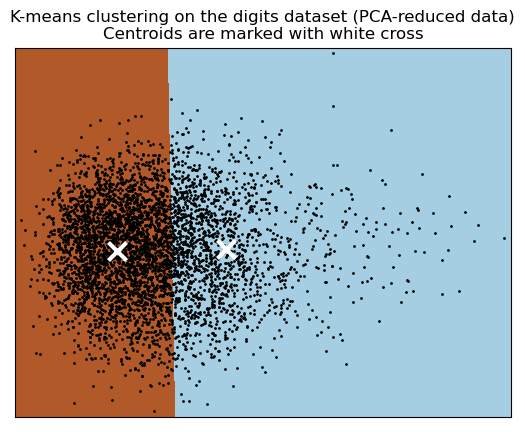

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(feature_list)
k = KMeans(init="k-means++", n_clusters=2, n_init=10)
k.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = k.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = k.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()